In [1]:
# !pip install kagglehub

In [6]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = ""

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "prishatank/employee-hr-dataset",
  "Employee_HR.csv",
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

C:\Users\M.UMAIR\AppData\Local\Temp\ipykernel_6368\3869202725.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 701k/701k [00:01<00:00, 610kB/s]

First 5 records:     EmpId  Satisfaction  Evaluation  number_of_projects  average_montly_hours  \
0  780152           3.8         5.3                   2                   157   
1  780153           8.0         8.6                   5                   262   
2  780154           1.1         8.8                   7                   272   
3  780155           7.2         8.7                   5                   223   
4  780156           3.7         5.2                   2                   159   

   time_spent_company  work_accident  Promotion Department  Salary_INR  Churn  
0                   3              0          0      sales       11053      1  
1                   6              0          0      sales       54063      1  
2                   4              0          0      sales       61300      1  
3                   5              0          0      sales       20647      1  
4                   3              0          0      sales       17808      1  


In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 
import mlflow 


In [9]:
# df=pd.read_csv('/kaggle/input/employee-hr-dataset/Employee_HR.csv')

In [10]:
df.head()

,EmpId,Satisfaction,Evaluation,number_of_projects,average_montly_hours,time_spent_company,work_accident,Promotion,Department,Salary_INR,Churn
0,780152,3.8,5.3,2,157,3,0,0,sales,11053,1
1,780153,8.0,8.6,5,262,6,0,0,sales,54063,1
2,780154,1.1,8.8,7,272,4,0,0,sales,61300,1
3,780155,7.2,8.7,5,223,5,0,0,sales,20647,1
4,780156,3.7,5.2,2,159,3,0,0,sales,17808,1


In [11]:
df.drop('EmpId',axis=1,inplace=True)

In [12]:
df.isnull().sum()

Satisfaction            0
Evaluation              0
number_of_projects      0
average_montly_hours    0
time_spent_company      0
work_accident           0
Promotion               0
Department              0
Salary_INR              0
Churn                   0
dtype: int64

In [13]:
df[df.duplicated()]

,Satisfaction,Evaluation,number_of_projects,average_montly_hours,time_spent_company,work_accident,Promotion,Department,Salary_INR,Churn


In [14]:
df.dtypes

Satisfaction            float64
Evaluation              float64
number_of_projects        int64
average_montly_hours      int64
time_spent_company        int64
work_accident             int64
Promotion                 int64
Department               object
Salary_INR                int64
Churn                     int64
dtype: object

In [15]:
df.head()

,Satisfaction,Evaluation,number_of_projects,average_montly_hours,time_spent_company,work_accident,Promotion,Department,Salary_INR,Churn
0,3.8,5.3,2,157,3,0,0,sales,11053,1
1,8.0,8.6,5,262,6,0,0,sales,54063,1
2,1.1,8.8,7,272,4,0,0,sales,61300,1
3,7.2,8.7,5,223,5,0,0,sales,20647,1
4,3.7,5.2,2,159,3,0,0,sales,17808,1


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_ds,test_ds=train_test_split(df,test_size=0.2,random_state=4)

In [18]:
train_ds.head()

,Satisfaction,Evaluation,number_of_projects,average_montly_hours,time_spent_company,work_accident,Promotion,Department,Salary_INR,Churn
2205,7.0,6.9,3,102,4,1,0,product_mng,95873,0
11396,6.3,4.8,4,180,4,0,0,management,136980,0
7877,4.3,4.6,2,239,3,1,0,sales,41283,0
2634,4.4,4.2,4,159,4,0,0,technical,65477,0
8807,4.9,6.8,3,181,3,0,0,accounting,41038,0


In [19]:
categprical_cols=train_ds.dtypes[train_ds.dtypes!='float'].index
numerical_cols=train_ds.dtypes[train_ds.dtypes=='float'].index

In [20]:
categprical_cols

Index(['number_of_projects', 'average_montly_hours', 'time_spent_company',
       'work_accident', 'Promotion', 'Department', 'Salary_INR', 'Churn'],
      dtype='object')

In [21]:
numerical_cols=['Satisfaction', 'Evaluation','average_montly_hours','Salary_INR']
categprical_cols=['number_of_projects',
       'work_accident', 'Promotion', 'Department','time_spent_company', 'Churn']

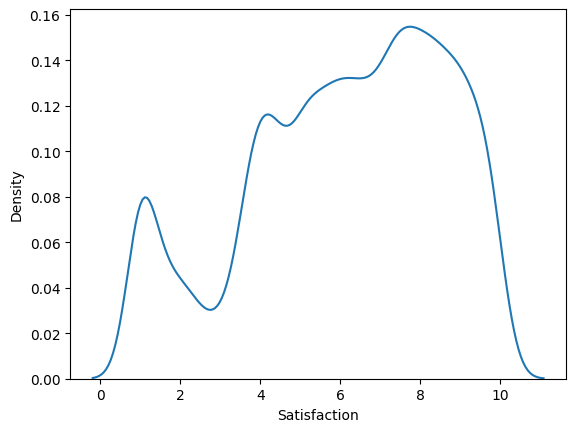

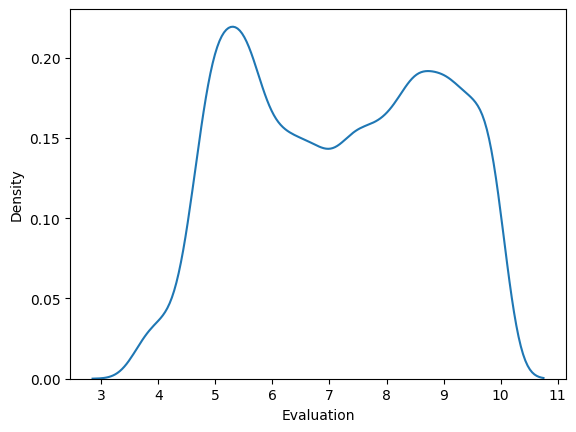

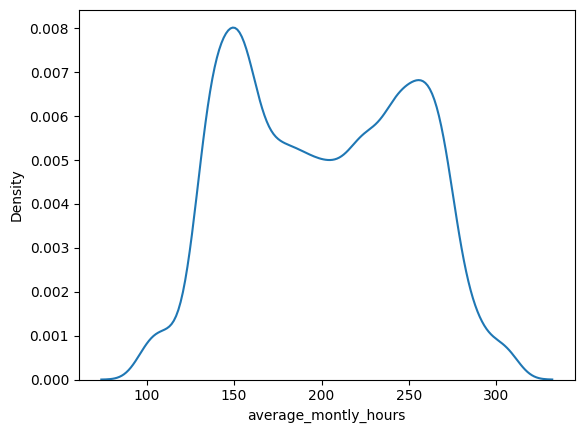

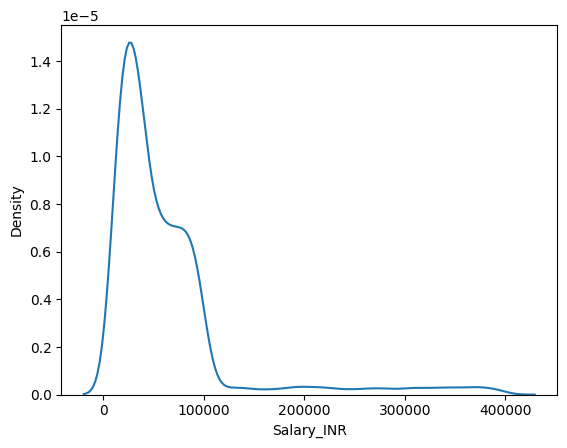

In [22]:
for col in numerical_cols:
    sns.kdeplot(df[col])
    plt.show()
    

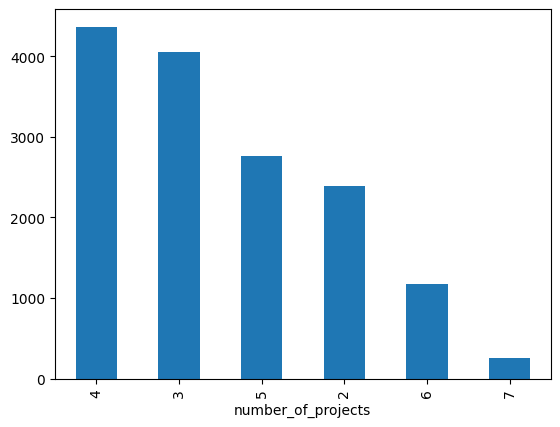

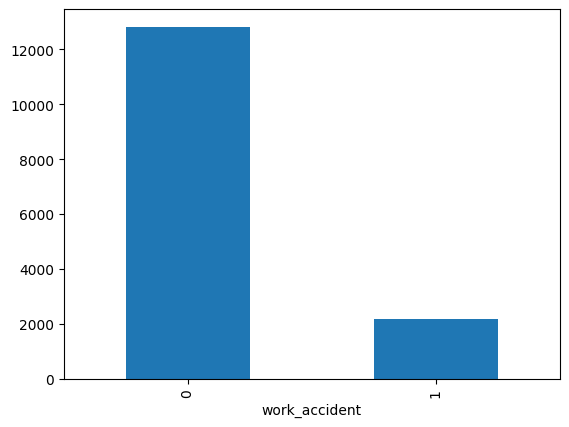

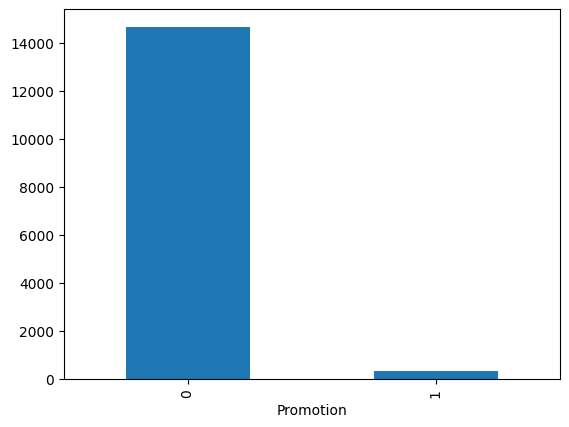

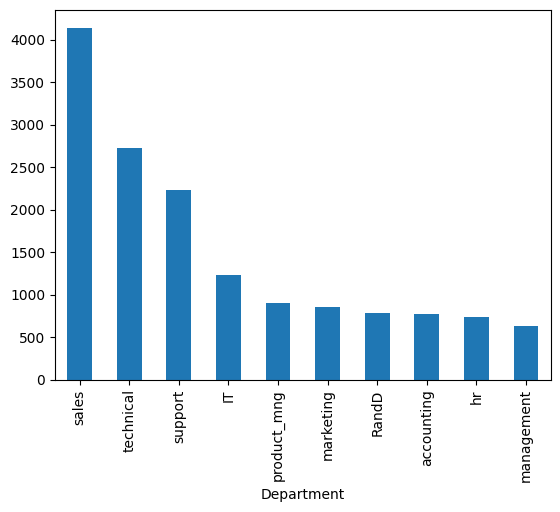

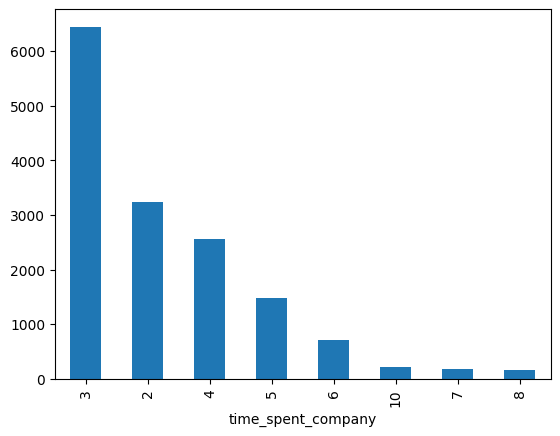

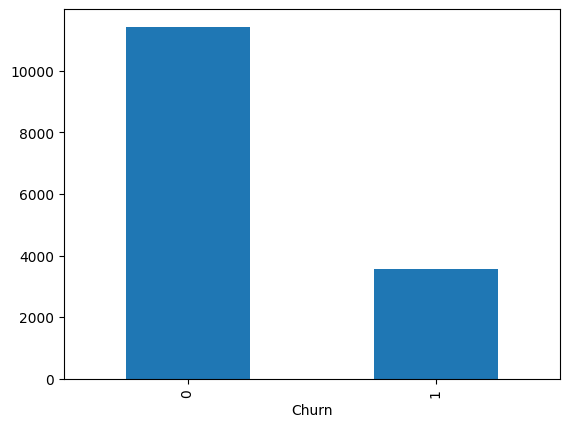

In [23]:
for col in categprical_cols:
    df[col].value_counts().plot(kind='bar')
    plt.show()
    

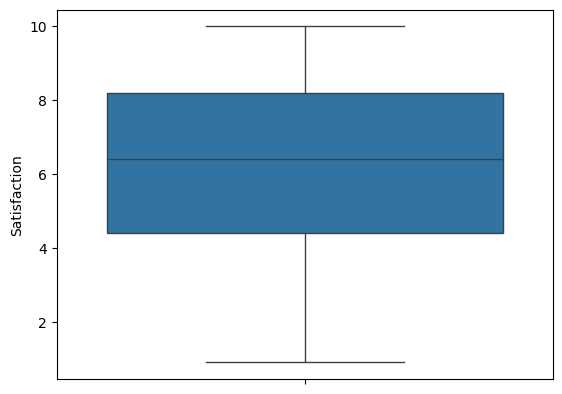

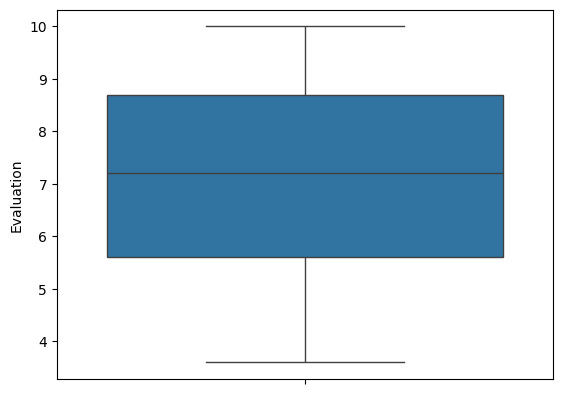

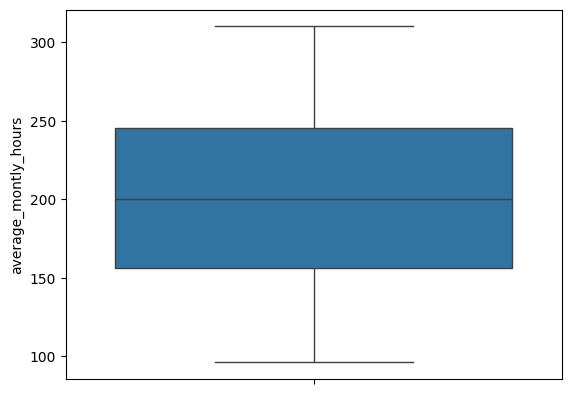

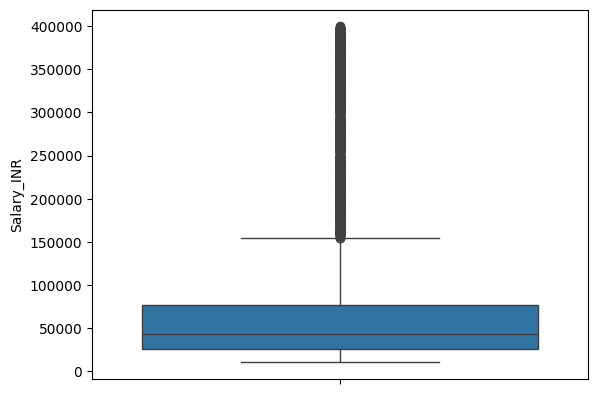

In [24]:
for col in numerical_cols:
    sns.boxplot(train_ds[col])
    plt.show()

For IT Department IT


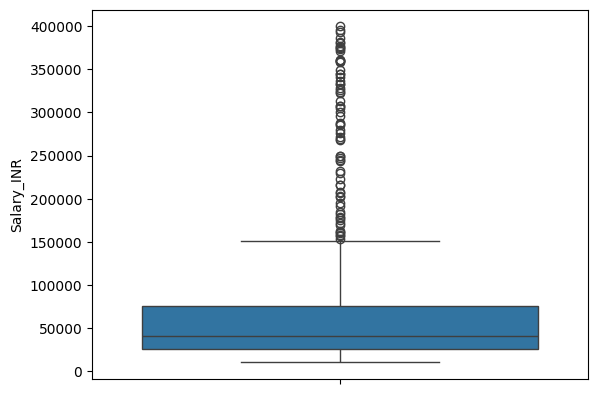

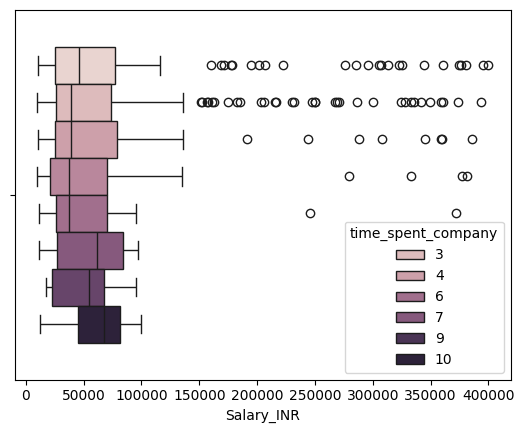

For IT Department RandD


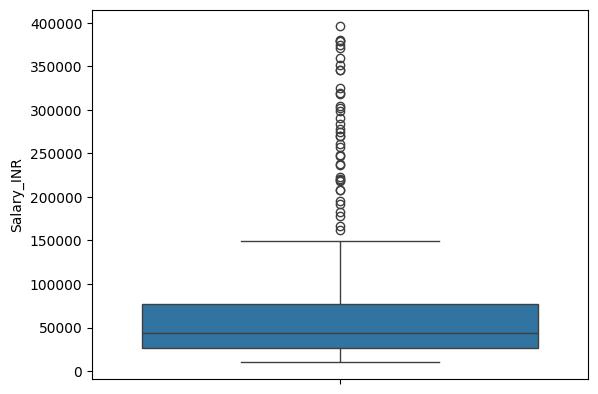

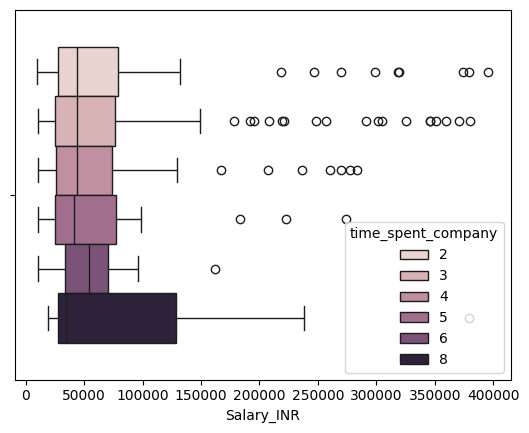

For IT Department accounting


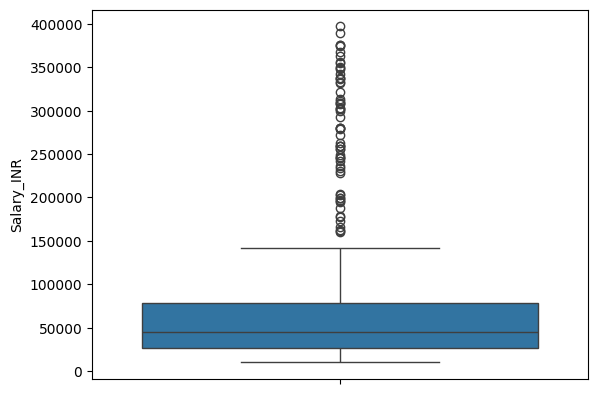

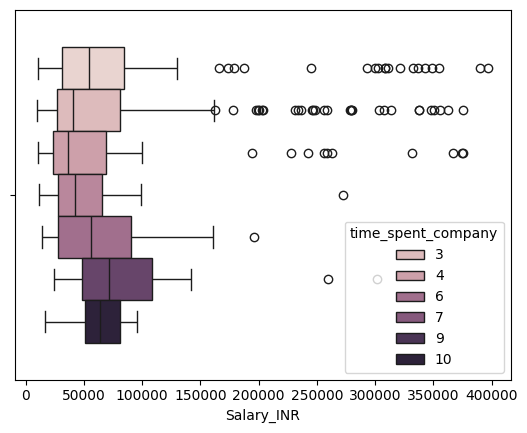

For IT Department hr


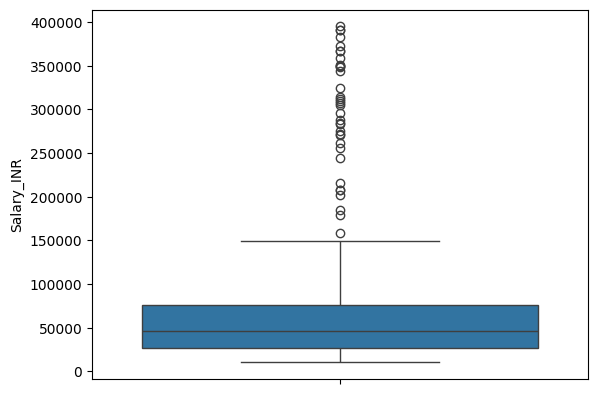

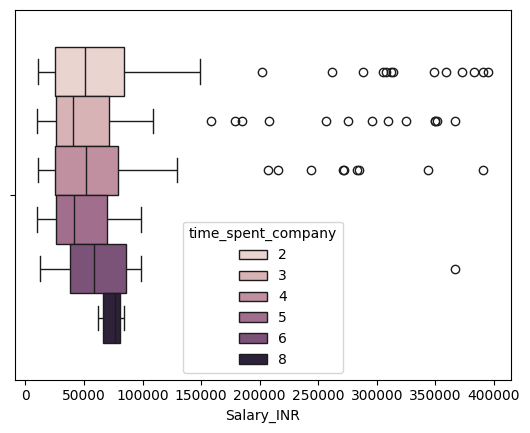

For IT Department management


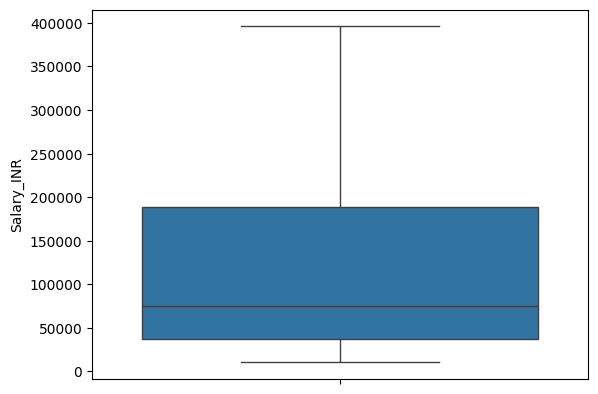

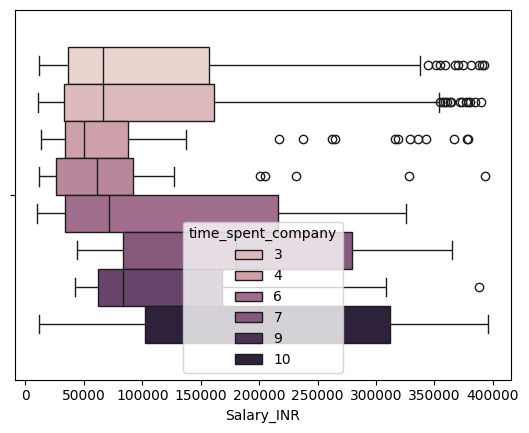

For IT Department marketing


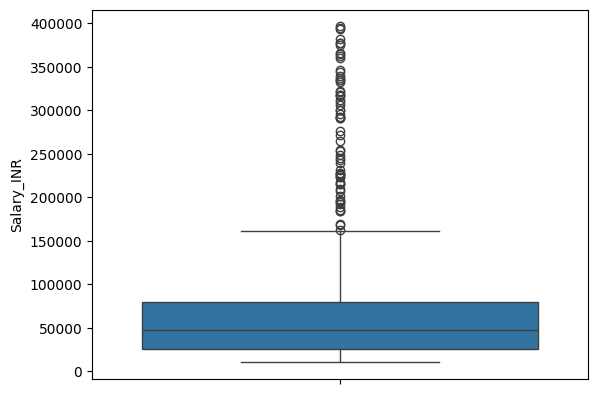

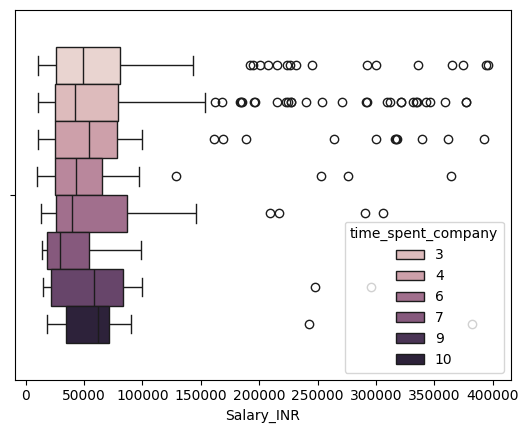

For IT Department product_mng


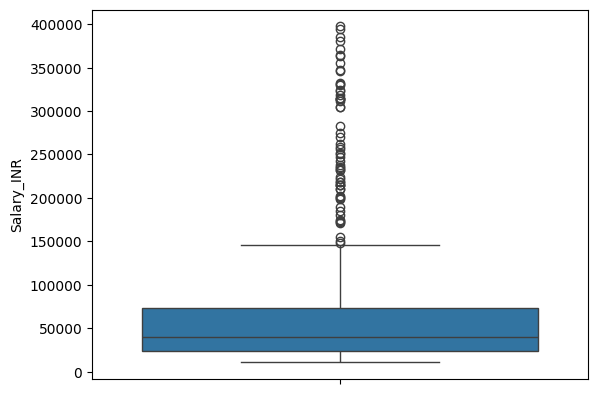

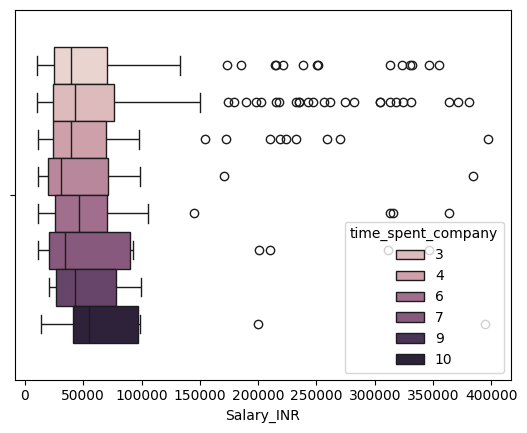

For IT Department sales


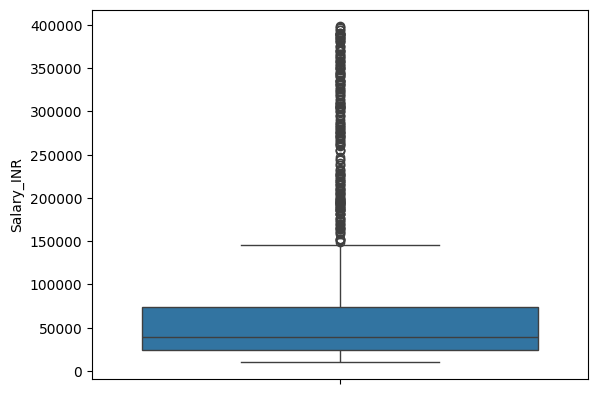

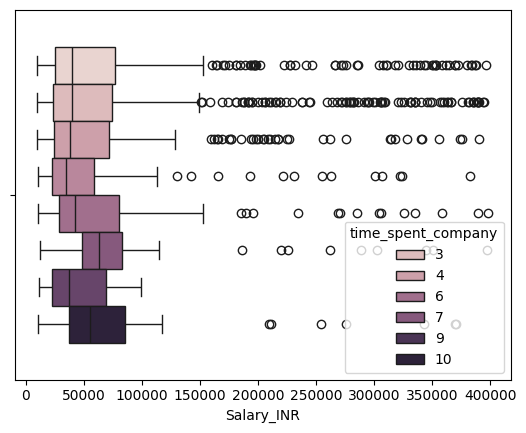

For IT Department support


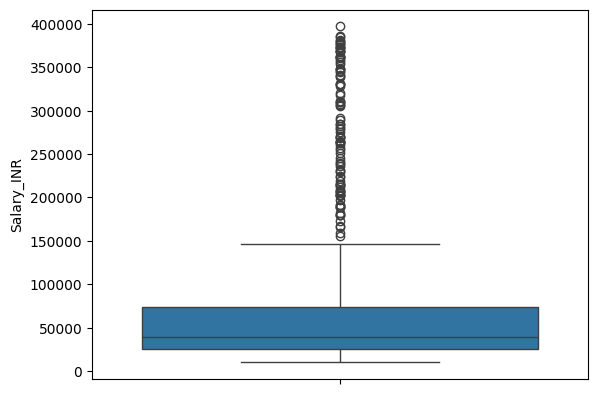

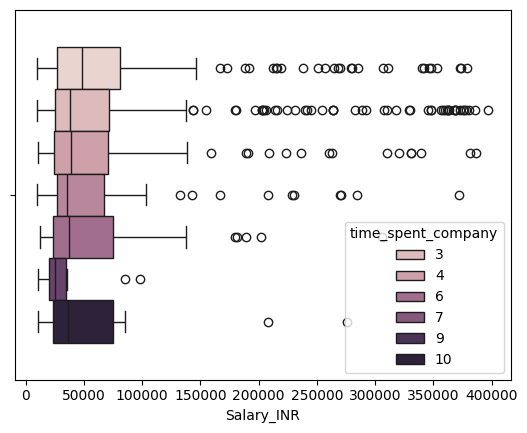

For IT Department technical


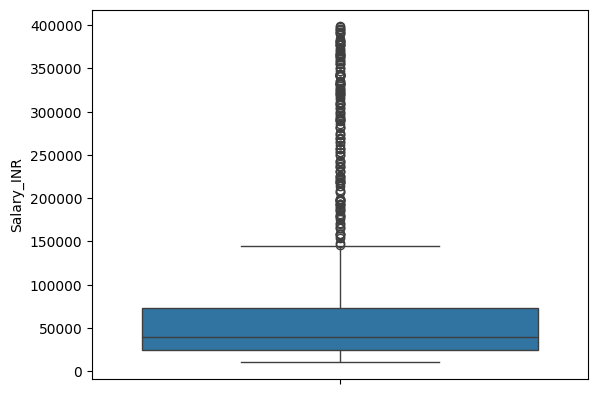

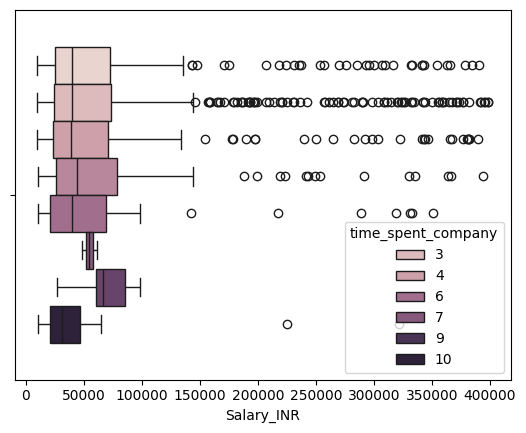

C:\Users\M.UMAIR\AppData\Local\Temp\ipykernel_6368\3802183030.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('Department').apply(plot_boxplot)


""


In [25]:
def plot_boxplot(group):
    print('For IT Department', group.name)
    
    sns.boxplot(group['Salary_INR'])
    plt.show()
    print('\n\n\n')
    sns.boxplot(x='Salary_INR',hue='time_spent_company',data=group)   
    plt.show()
    
df.groupby('Department').apply(plot_boxplot)

### We need to handle the outlier by grouping firstly data to department wise and then year spends time 

## MultiVariate Analysis

<Axes: xlabel='Salary_INR', ylabel='Density'>

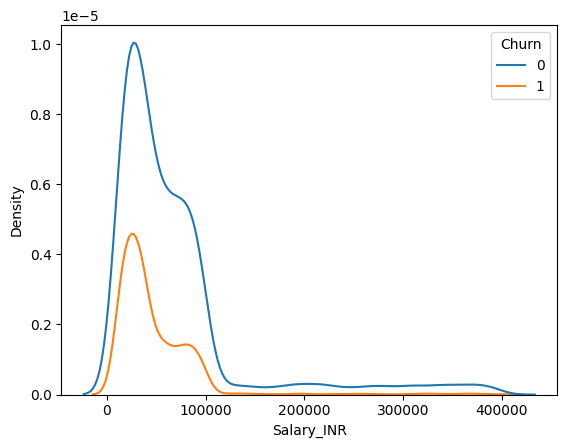

In [26]:
sns.kdeplot(x='Salary_INR',hue='Churn',data=df)

<Axes: xlabel='Salary_INR', ylabel='Density'>

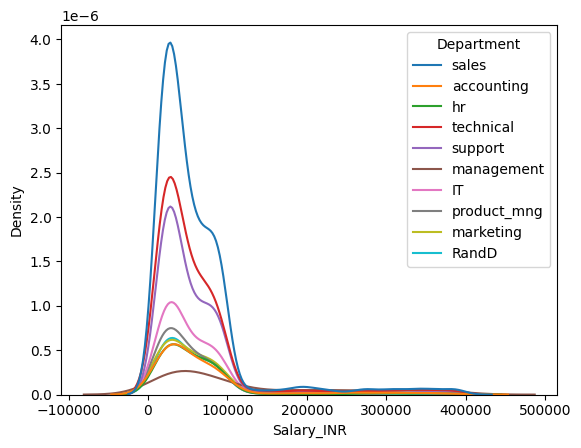

In [27]:
sns.kdeplot(x='Salary_INR',hue='Department',data=df)

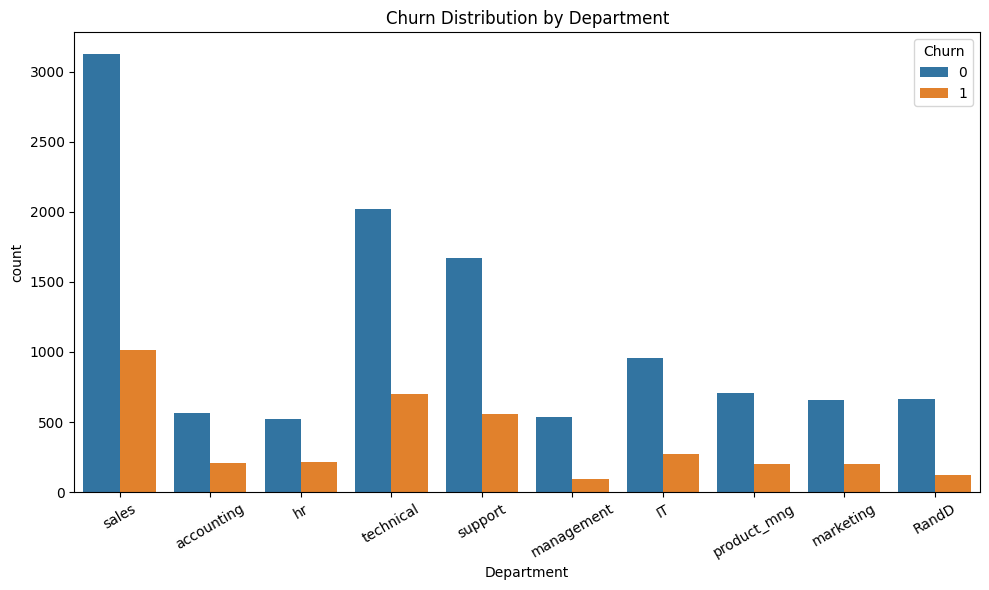

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x='Department', hue='Churn', data=df)
plt.title("Churn Distribution by Department")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

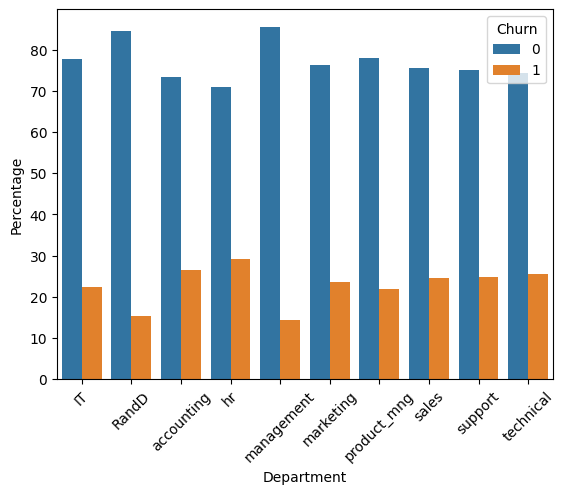

In [29]:
churn_percent = df.groupby(['Department', 'Churn']).size().reset_index(name='Count')

churn_percent['Percentage'] = churn_percent.groupby('Department')['Count']\
                                            .transform(lambda x: x / x.sum() * 100)


sns.barplot(x='Department', y='Percentage', hue='Churn', data=churn_percent)
plt.xticks(rotation=45)
plt.show()

In [30]:
# churn is mostly not directly related with Departments and sales amount,
# which means that Churn is not related to any department and 
# also it is not depand on salary (less or more salary is not forcing to churn )

#### Churn is not related to any department and 
#### also it is not depand on salary (less or more salary is not forcing to churn )

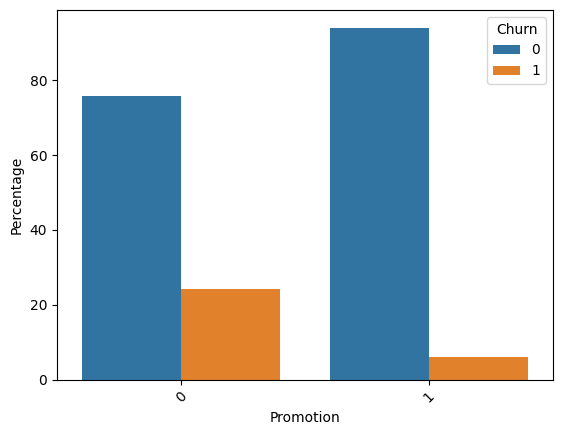

In [31]:
churn_percent = df.groupby(['Promotion', 'Churn']).size().reset_index(name='Count')

churn_percent['Percentage'] = churn_percent.groupby('Promotion')['Count']\
                                            .transform(lambda x: x / x.sum() * 100)


sns.barplot(x='Promotion', y='Percentage', hue='Churn', data=churn_percent)
plt.xticks(rotation=45)
plt.show()

#### This plot indicates that promotion may have an effect on employee churn.

#### Result: Promotion appears to play a critical role in an employee's decision to leave or stay in the company.


In [32]:
df.columns

Index(['Satisfaction', 'Evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spent_company', 'work_accident',
       'Promotion', 'Department', 'Salary_INR', 'Churn'],
      dtype='object')

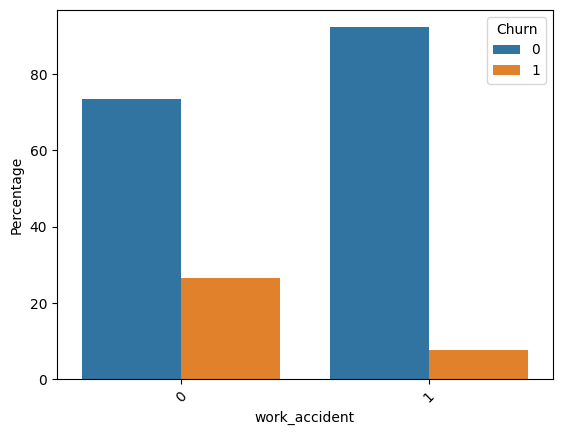

In [33]:
churn_percent = df.groupby(['work_accident', 'Churn']).size().reset_index(name='Count')

churn_percent['Percentage'] = churn_percent.groupby('work_accident')['Count']\
                                            .transform(lambda x: x / x.sum() * 100)


sns.barplot(x='work_accident', y='Percentage', hue='Churn', data=churn_percent)
plt.xticks(rotation=45)
plt.show()

In [34]:
df.columns

Index(['Satisfaction', 'Evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spent_company', 'work_accident',
       'Promotion', 'Department', 'Salary_INR', 'Churn'],
      dtype='object')

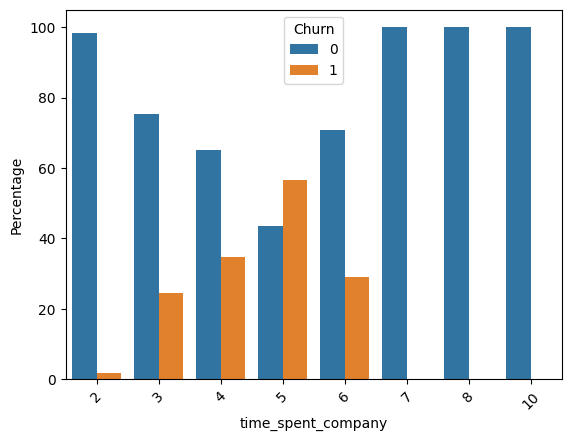

In [35]:
churn_percent = df.groupby(['time_spent_company', 'Churn']).size().reset_index(name='Count')

churn_percent['Percentage'] = churn_percent.groupby('time_spent_company')['Count']\
                                            .transform(lambda x: x / x.sum() * 100)


sns.barplot(x='time_spent_company', y='Percentage', hue='Churn', data=churn_percent)
plt.xticks(rotation=45)
plt.show()

##### This plot indicates that most employees who are leaving the company have spent between 2 and 6 years at the company.

#### **Note:** We will now explore the subset of data where employees have spent between 2 and 6 years at the company. Additionally, we will examine the relationship between tenure (YearsAtCompany) and the Promotion column.


In [36]:
filtered_df = df[df['time_spent_company'].isin([3, 4, 5])]
filtered_df.head()

,Satisfaction,Evaluation,number_of_projects,average_montly_hours,time_spent_company,work_accident,Promotion,Department,Salary_INR,Churn
0,3.8,5.3,2,157,3,0,0,sales,11053,1
2,1.1,8.8,7,272,4,0,0,sales,61300,1
3,7.2,8.7,5,223,5,0,0,sales,20647,1
4,3.7,5.2,2,159,3,0,0,sales,17808,1
5,4.1,5.0,2,153,3,0,0,sales,38805,1


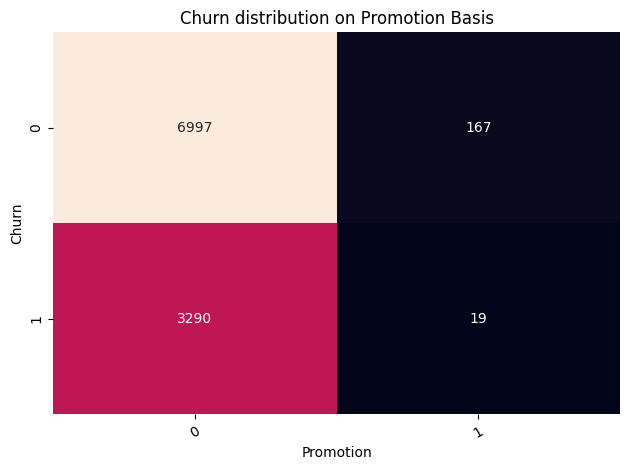

In [37]:
sns.heatmap(pd.crosstab(index=filtered_df['Churn'],columns=filtered_df['Promotion'],values=filtered_df['time_spent_company'],aggfunc='count'),annot=True,fmt=".0f",cbar=False)
plt.title("Churn distribution on Promotion Basis")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

#### The heatmap represents the churn distribution based on promotion status for employees whose tenure ranges between 2 and 6 years.

The results show that among employees who were not promoted (Promotion = 0), a significantly high number left the company (3290 employees), compared to those who were promoted (Promotion = 1), where only 19 employees left.

Even within this specific tenure group (2–6 years), churn is considerably higher among employees who did not receive promotions.

#### Conclusion:
This analysis suggests that promotion plays a crucial role in retaining mid-tenure employees (2–6 years). Lack of promotion during this critical period may increase the likelihood of employees leaving the company.


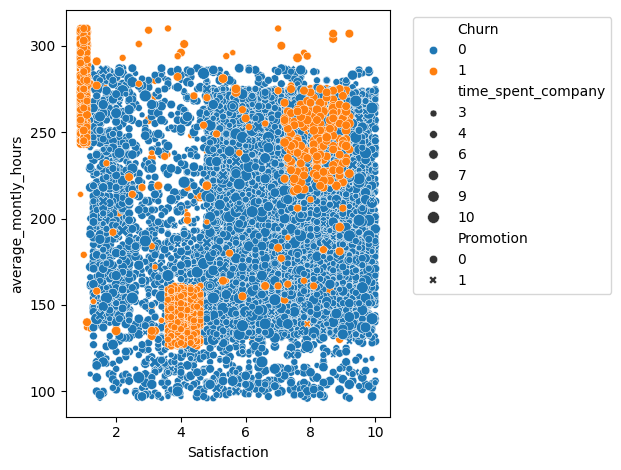

In [38]:
sns.scatterplot(x='Satisfaction',y='average_montly_hours',hue='Churn',size='time_spent_company',style='Promotion',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # 👈 moves legend outside
plt.tight_layout()
plt.show()

In [39]:
cols=['Satisfaction', 'Evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spent_company', 'work_accident',
       'Promotion', 'Salary_INR', 'Churn']

<Axes: >

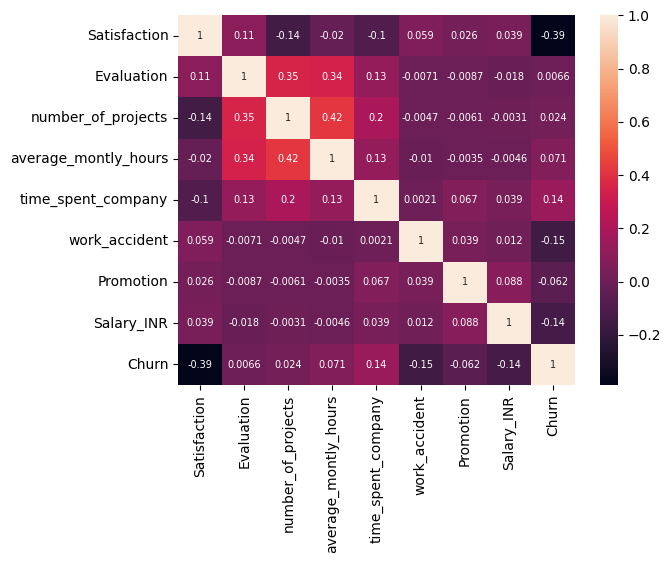

In [40]:
sns.heatmap(df[cols].corr(),annot=True,annot_kws={
    'size':7
})

In [41]:
df.shape

(14999, 10)

In [42]:
train_ds.shape

(11999, 10)

In [43]:
x_train=train_ds.drop('Churn',axis=1)
y_train=train_ds['Churn']
x_test=test_ds.drop('Churn',axis=1)
y_test=test_ds['Churn']

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [45]:
x_train.head(1)

,Satisfaction,Evaluation,number_of_projects,average_montly_hours,time_spent_company,work_accident,Promotion,Department,Salary_INR
2205,7.0,6.9,3,102,4,1,0,product_mng,95873


In [46]:
x_train.shape

(11999, 9)

In [47]:
trf=ColumnTransformer(transformers=[
    ('applying Standard Scalling',StandardScaler(),[0,1,2,3,4,5,6,8]),
    ('applying one Hot Encoding ',OneHotEncoder(drop='first',sparse_output=True),[7])
],remainder='passthrough')

In [48]:
max_depth=3
n_estimators=200
bootstrap=True
max_features=0.75

In [49]:
pipe=Pipeline(steps=[
    ('trf',trf),
    ('model',RandomForestClassifier(max_depth=max_depth,n_estimators=n_estimators,bootstrap=bootstrap,max_features=max_features,class_weight='balanced'))
])

In [50]:
pipe

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('trf', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('applying Standard Scalling', ...), ('applying one Hot Encoding ', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If

In [60]:
pipe.steps[1][1]

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",0.75
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_tr

In [51]:
# lg=LogisticRegression(max_iter=200)
pipe.fit(x_train,y_train)
y_train_pred=pipe.predict(x_train)
y_test_pred=pipe.predict(x_test)

In [52]:
print('train accuracy',accuracy_score(y_train,y_train_pred))
print('test accuracy',accuracy_score(y_test,y_test_pred))

train accuracy 0.9149929160763397
test accuracy 0.915


In [53]:
print('train recall',recall_score(y_train,y_train_pred))
print('test recall',recall_score(y_test,y_test_pred))

train recall 0.9415675297410777
test recall 0.9354838709677419


In [55]:
print('train precision',precision_score(y_train,y_train_pred))
print('test precision',precision_score(y_test,y_test_pred))

train precision 0.7593115124153499
test precision 0.7614155251141552


In [124]:
print('train classification report \n',classification_report(y_train,y_train_pred))

train classification report 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96      9141
           1       0.84      0.93      0.88      2858

    accuracy                           0.94     11999
   macro avg       0.91      0.94      0.92     11999
weighted avg       0.94      0.94      0.94     11999



In [125]:
print('test classification report \n',classification_report(y_test,y_test_pred))

test classification report 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      2287
           1       0.85      0.92      0.88       713

    accuracy                           0.94      3000
   macro avg       0.91      0.94      0.92      3000
weighted avg       0.95      0.94      0.94      3000



In [ ]:
mlflow.set_tracking_uri('file:///C:/Users/M.UMAIR/Desktop/mlops/employee_churn_prediction')
mlflow.set_experiment(experiment_name='model_with_rf')
with mlflow.start_run():
    mlflow.log_param('max_depth',max_depth)
    mlflow.log_param('bootstrap',bootstrap)
    mlflow.log_param('n_estimators',n_estimators)
    mlflow.log_param('max_features',max_features)


    mlflow.log_metric('train accuracy',accuracy_score(y_train,y_train_pred))
    mlflow.log_metric('test accuracy',accuracy_score(y_test,y_test_pred))
    mlflow.log_metric('train recall',recall_score(y_train,y_train_pred))
    mlflow.log_metric('test recall',recall_score(y_test,y_test_pred))

    mlflow.log_metric('train precision',precision_score(y_train,y_train_pred))
    mlflow.log_metric('test precision',precision_score(y_test,y_test_pred))


    mlflow.sklearn.log_model(pipe.steps[1][1])

2026/02/22 13:08:23 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/02/22 13:08:23 INFO mlflow.store.db.utils: Updating database tables
2026/02/22 13:08:25 INFO mlflow.tracking.fluent: Experiment with name 'model_with_rf' does not exist. Creating a new experiment.
2026/02/22 13:08:25 WARNING mlflow.sklearn: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization. The recommended safe alternative is the 'skops' format. For more information, see: https://scikit-learn.org/stable/model_persistence.html
